<a href="https://colab.research.google.com/github/premsugan84/Neural-Networks-Classification/blob/master/Project_NeuralNetworks_PremFrancis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load Data**

In [ ]:
% cd drive/My Drive/DLCP/Project 1/Data

/content/drive/My Drive/DLCP/Project 1/Data


In [ ]:
dataFile = 'bank.csv'

In [ ]:
df_bank = pd.read_csv(dataFile)

**Univariate Analysis**

In [ ]:
df_bank.shape

(10000, 14)

In [ ]:
df_bank.head()
#Looks like there are some columns like Customer Id and Surname which is not relevant for analysis, we will drop it after initial check

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_bank.describe()
# Minimal value seems to look correct as there is no negative values
#Below displays 11 columns which is right as there are 3 columns which are non-numeric

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df_bank.isnull().values.any()
# As an additional check the result confirms there is no null values

False

In [ ]:
#Dropping CustomerID, RowNumber and Surname from the dataset
df_bank = df_bank.drop(['RowNumber'], axis=1)

In [ ]:
df_bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_bank = df_bank.drop(['CustomerId'], axis=1)
df_bank = df_bank.drop(['Surname'], axis=1)

In [ ]:
#The changes are reflected in the below
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_bank.shape

(10000, 11)

In [ ]:
#Lets check the data types just to confirm they are numeric other than 2 columns
df_bank.dtypes

#Below confirms that except geography and gender everything else is numeric between int and float

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#convert geography to numeric values
df_bank['geography'] = df_bank['Geography'].map(lambda x: {1: 'France', 2: 'Germany', 3: 'Spain'}.get(x))

In [ ]:
#convert gender to numeric values
df_bank['gender'] = df_bank['Gender'].map(lambda x: {1: 'Male', 2: 'Female'}.get(x))

In [ ]:
#Doing one hot columsn for geography and gender
df_bank = pd.get_dummies(df_bank, columns=['Geography', 'Gender'])

In [ ]:
df_bank.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
geography             object
gender                object
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [ ]:
df_bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geography,gender,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,None,None,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,None,None,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,None,None,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,None,None,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,None,None,0,0,1,1,0


In [ ]:
#Dropping the non-numerical columns of geography and gender
df_bank = df_bank.drop(['geography'], axis=1)
df_bank = df_bank.drop(['gender'], axis=1)

In [ ]:
df_bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_bank.shape

(10000, 14)

**Multivariate Analysis**

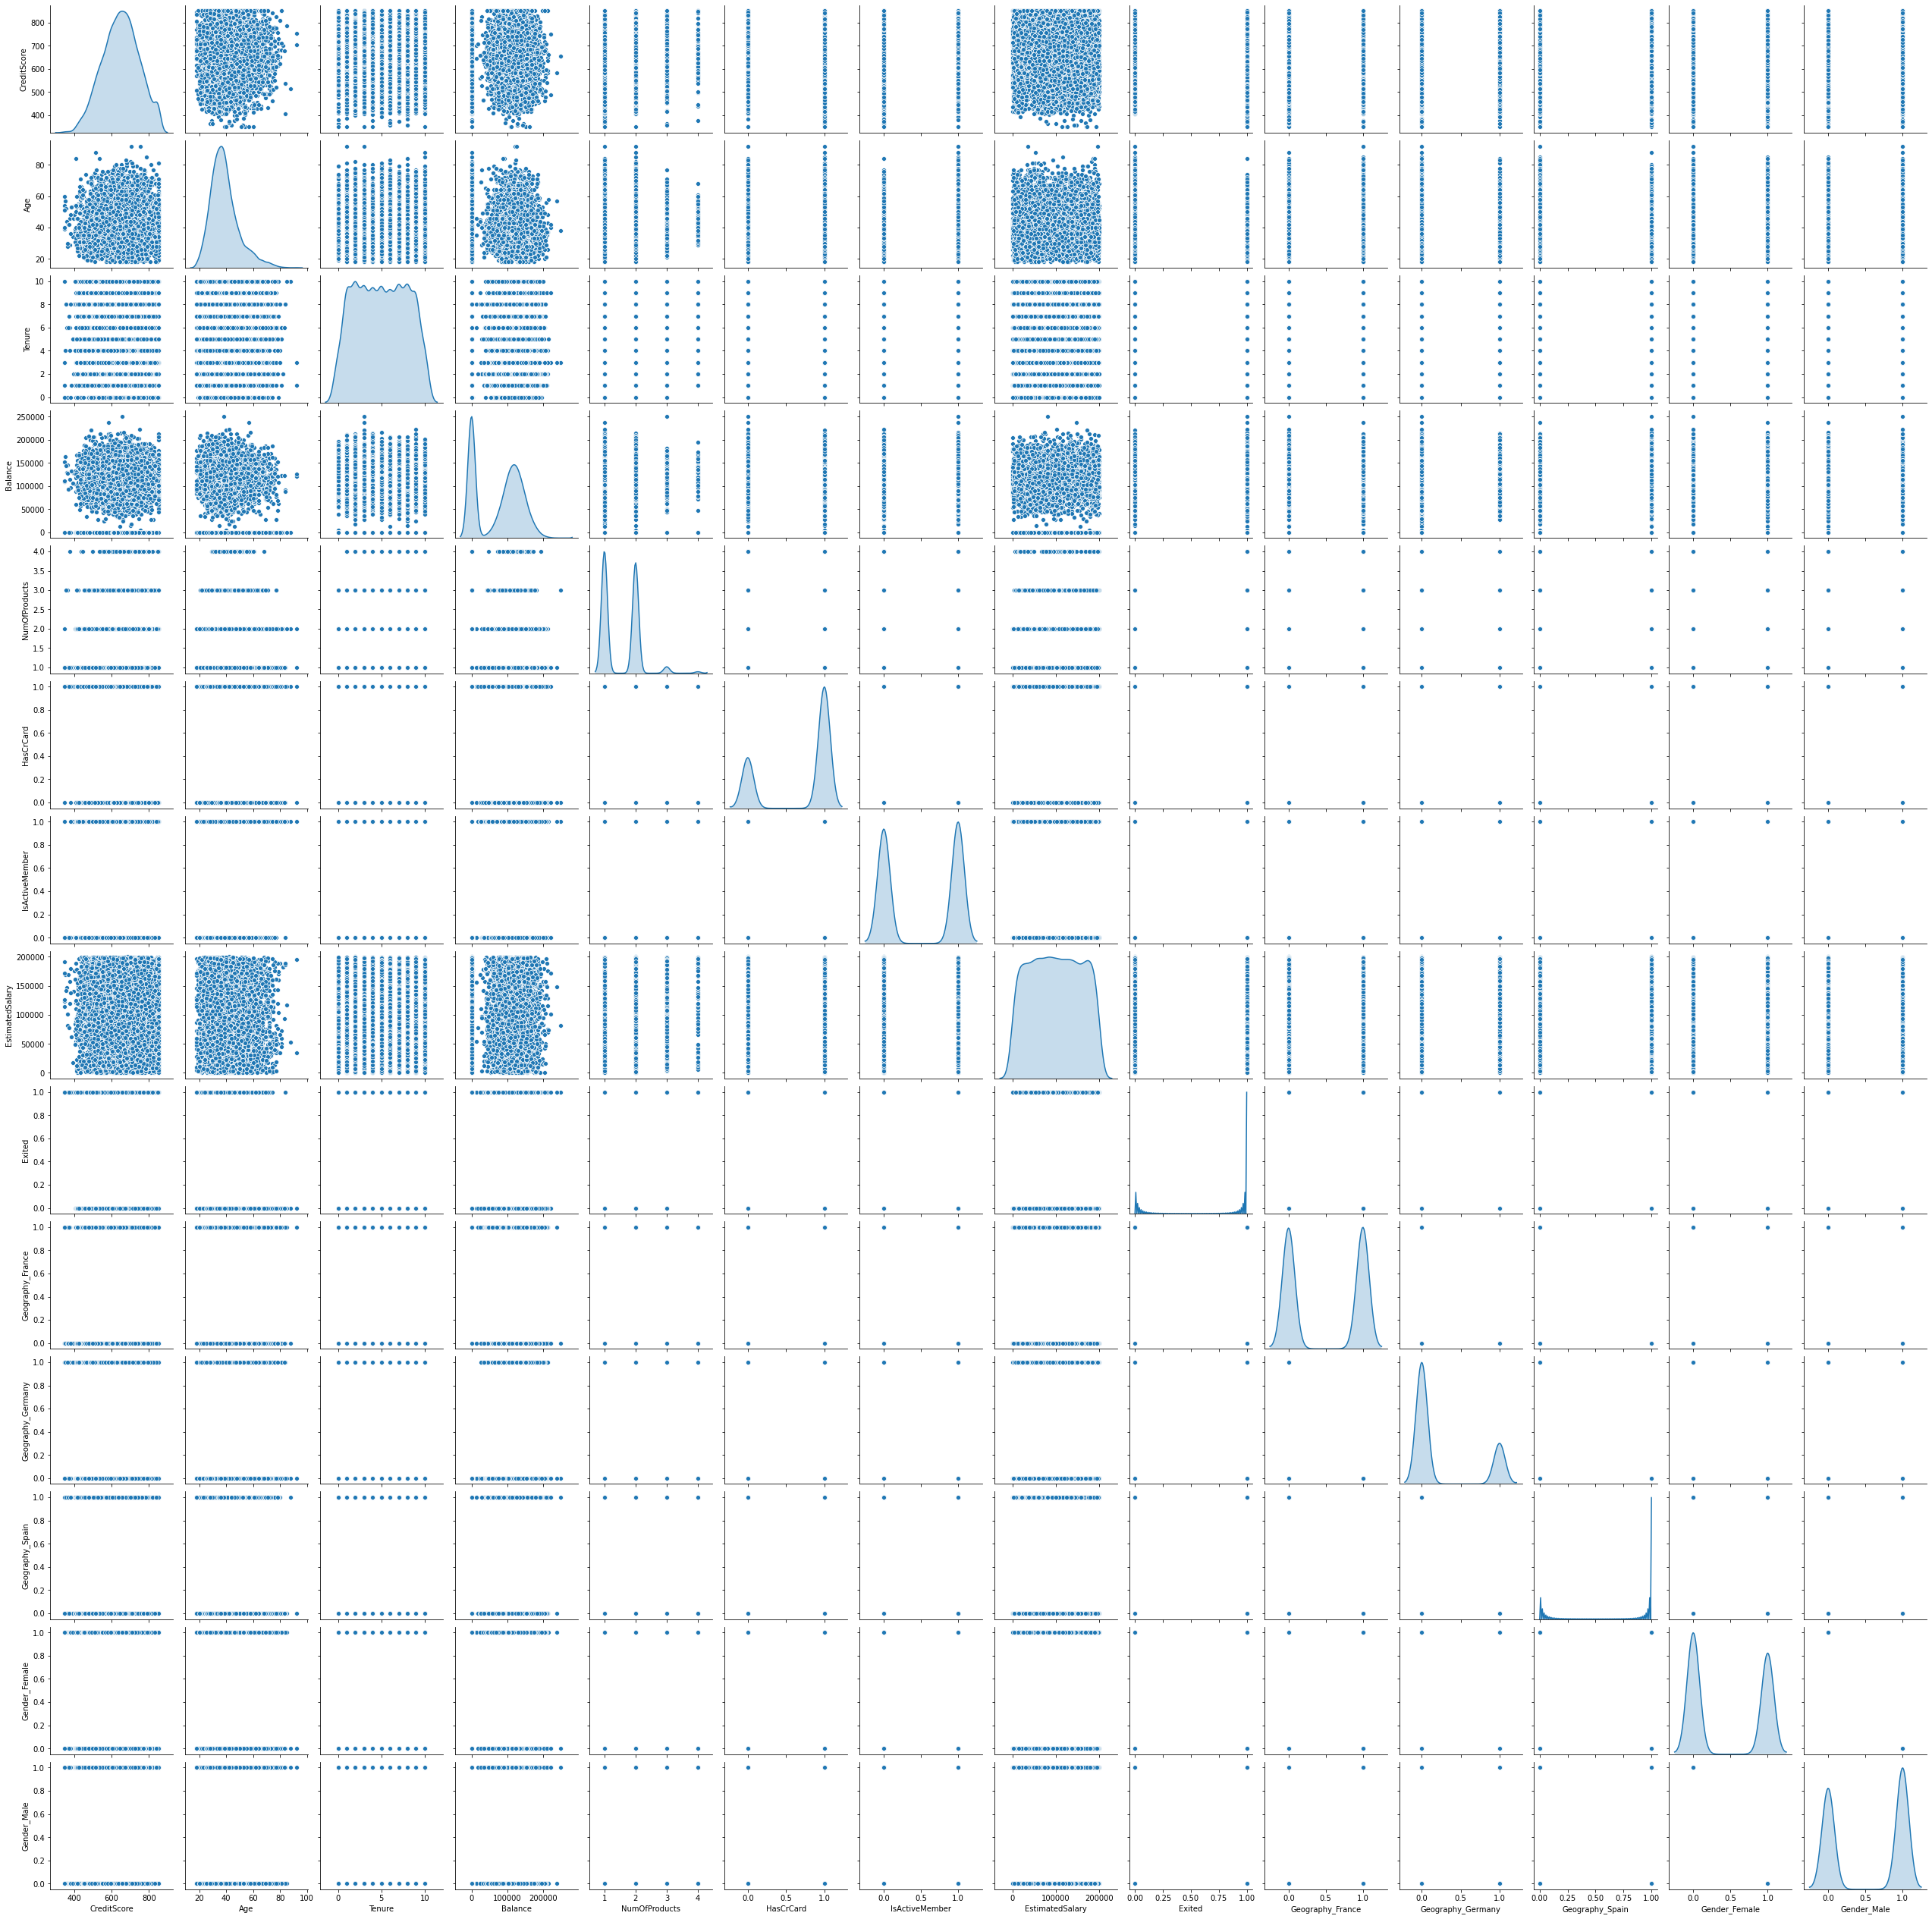

In [ ]:
#Lets further check the data using pairplot 
sns.pairplot(df_bank, diag_kind="kde")
#People with higher age stayed than exited
#Higher balance customer has exited 
#Customers who own more products has exited 

In [ ]:
#Lets check the coorleation between the fields
df_bank.corr()
#Exited has good positive coorleation with Age, Balance, Germany and Female 
#Exited has good negative coorleation with Active Member, France and Male

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


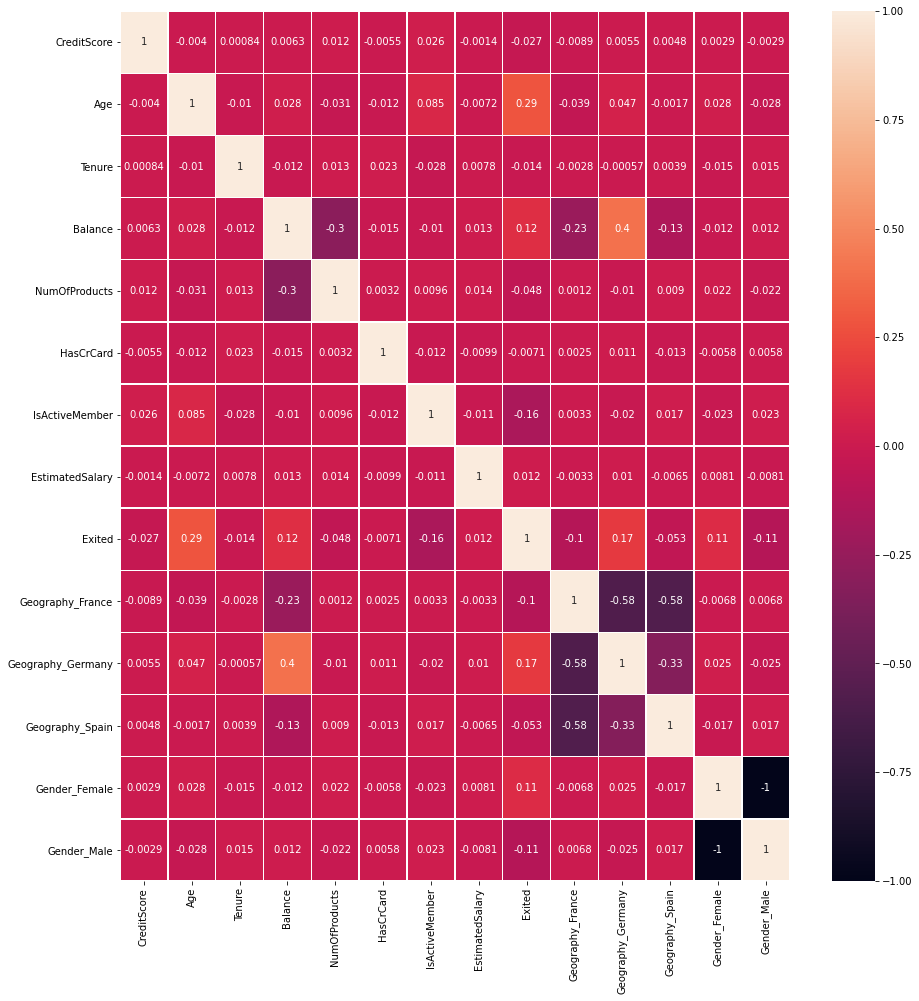

In [ ]:
#Lets also validate using a heat map 
plt.figure(figsize=(15, 16))
sns.heatmap(df_bank.corr(), annot=True, linewidths=.5)
#Could see most of the same observation in the above coorleation table

**Train and Test data Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df_bank.drop(['Exited'], axis=1)
y= df_bank['Exited']

X_train, X_test, Y_train, Y_Test = train_test_split(x, y, test_size=0.30, random_state=42)

Normalize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

#Define Scaler
scaler = StandardScaler().fit(X_train)

#Scale the train set
X_train = scaler.transform(X_train)

#Scale the test test 
X_test = scaler.transform(X_test)

**Model Building**

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=30, batch_size=500, validation_split= 0.2, verbose=1)

Epoch 1/30
12/12 [==============================] - 0s 17ms/step - loss: 0.7006 - accuracy: 0.5366 - val_loss: 0.6532 - val_accuracy: 0.6207
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.6611 - val_loss: 0.6018 - val_accuracy: 0.7336
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7386 - val_loss: 0.5701 - val_accuracy: 0.7764
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5653 - accuracy: 0.7730 - val_loss: 0.5485 - val_accuracy: 0.7843
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5458 - accuracy: 0.7873 - val_loss: 0.5316 - val_accuracy: 0.7921
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7905 - val_loss: 0.5171 - val_accuracy: 0.7971
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5172 - accuracy: 0.7921 - val_loss: 0.5046 - val_accuracy: 0.7964
Epoch 8/30
12/12 [=

In [ ]:
loss,acc = model.evaluate(X_test, Y_Test, verbose=0)
print('Accuracy: %3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.836333
Loss: 0.409


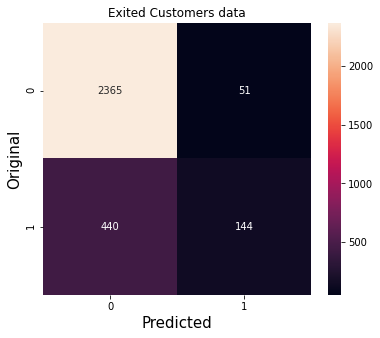

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test) > 0.5  # manual threshold
matConf = confusion_matrix(Y_Test, Y_pred)
valsize = Y_Test.shape[0]

plt.figure(figsize=(6, 5))  # Establishing the heatmap size before plotting
ax = sns.heatmap(matConf, annot=True, fmt=".0f")
ax.set_ylabel('Original', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
plt.title("Exited Customers data")
plt.show()

**Model with loss function as square hinge**


In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Dense(11, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, Y_train, epochs=20, batch_size=800, validation_split= 0.2, verbose=1)

Epoch 1/20
7/7 [==============================] - 0s 31ms/step - loss: 1.7826 - accuracy: 0.5259 - val_loss: 1.7636 - val_accuracy: 0.5643
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 1.7382 - accuracy: 0.5970 - val_loss: 1.7218 - val_accuracy: 0.6357
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 1.6977 - accuracy: 0.6750 - val_loss: 1.6820 - val_accuracy: 0.7371
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 1.6589 - accuracy: 0.7511 - val_loss: 1.6438 - val_accuracy: 0.7779
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 1.6216 - accuracy: 0.7800 - val_loss: 1.6064 - val_accuracy: 0.7921
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 1.5847 - accuracy: 0.7893 - val_loss: 1.5693 - val_accuracy: 0.7943
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 1.5475 - accuracy: 0.7918 - val_loss: 1.5316 - val_accuracy: 0.7936
Epoch 8/20
7/7 [=================

In [ ]:
loss2,acc2 = model2.evaluate(X_test, Y_Test, verbose=0)
print('Accuracy: %3f' % acc2)
print('Loss: %.3f' % loss2)

Accuracy: 0.805333
Loss: 1.119


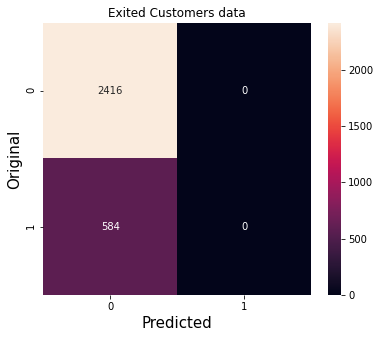

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model2.predict(X_test) > 0.5  # manual threshold
matConf = confusion_matrix(Y_Test, Y_pred)
valsize = Y_Test.shape[0]

plt.figure(figsize=(6, 5))  # Establishing the heatmap size before plotting
ax = sns.heatmap(matConf, annot=True, fmt=".0f")
ax.set_ylabel('Original', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
plt.title("Exited Customers data")
plt.show()

Model with Optimizer as SGD and loss as binary cross entropy

In [ ]:
model3 = Sequential()

In [ ]:
model3.add(Dense(11, activation='relu'))
model3.add(Dense(7, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model3.fit(X_train, Y_train, epochs=30, batch_size=800, validation_split= 0.2, verbose=1)

Epoch 1/30
7/7 [==============================] - 0s 11ms/step - loss: 0.5346 - accuracy: 0.7920 - val_loss: 0.5308 - val_accuracy: 0.7943
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.7920 - val_loss: 0.5298 - val_accuracy: 0.7943
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5326 - accuracy: 0.7920 - val_loss: 0.5288 - val_accuracy: 0.7943
Epoch 4/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5316 - accuracy: 0.7920 - val_loss: 0.5278 - val_accuracy: 0.7943
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5306 - accuracy: 0.7920 - val_loss: 0.5269 - val_accuracy: 0.7943
Epoch 6/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.7920 - val_loss: 0.5260 - val_accuracy: 0.7943
Epoch 7/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.7920 - val_loss: 0.5251 - val_accuracy: 0.7943
Epoch 8/30
7/7 [=================

In [ ]:
loss3,acc3 = model3.evaluate(X_test, Y_Test, verbose=0)
print('Accuracy: %3f' % acc3)
print('Loss: %.3f' % loss3)

Accuracy: 0.805333
Loss: 0.501


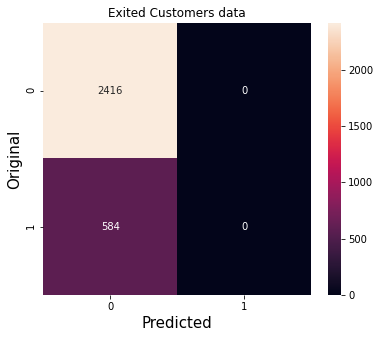

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred3 = model3.predict(X_test) > 0.5  # manual threshold
matConf = confusion_matrix(Y_Test, Y_pred3)
valsize = Y_Test.shape[0]

plt.figure(figsize=(6, 5))  # Establishing the heatmap size before plotting
ax = sns.heatmap(matConf, annot=True, fmt=".0f")
ax.set_ylabel('Original', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
plt.title("Exited Customers data")
plt.show()

**Conclusion** : We have tried three different model by changing the loss function between the binary cross entropy and Square hinge loss while also with different loss functions adam and SGD but the best accuracy with minimal loss and better Confusion Matrix is from the combination of loss function as binary cross entropy and optimizer as adam.


